# Fishoal project - ENSEEIHT

Shoal of fish modelisation with different behaviors


In [1]:
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

from fishes import Fish
from aquarium import Aquarium2D, AquariumKDTree2D, Aquarium3D
from behaviors import StraightToroidalBehavior, StraightReboundBehavior, StraightVariableReboundBehavior, RandomBehavior, TrafalgarBehavior, AokiBehavior

%matplotlib widget

In [5]:
## SIMULATION PARAMETERS
frame_delay = 10                            # delay between frames in ms
dt_simu = 2                                 # time step of simulation in ms
width = 1000                                # width of aquarium
height = 1000                               # height of aquarium 
depth = 1000                                # depth of aquarium (only for 3D simulation)
nb_fish = 100                                # number of fishes in simulation
fish_color = "orange"                       # color of fishes  

steve_orange_img = plt.imread("./../ressources/steve_orange.png")
steve_red_img = plt.imread("./../ressources/steve_red.png")
steve_green_img = plt.imread("./../ressources/steve_green.png")

# PART I : Random behavior

## Version 1 : Random initial position and velocity with rebound

Fishes are added with random position and random velocity vector (normalized). They move straight at constant speed and rebound on aquarium edges.

### 2D

In [3]:
# Create the fishes in a 2D aquarium 
aquarium = Aquarium2D(width, height, nb_fish, dt_simu)
for i in range(0, nb_fish):
    position = np.random.rand(2) * [width, height]
    velocity = (np.random.rand(2) * 2 - 1)
    velocity /= np.linalg.norm(velocity)
    behavior = StraightReboundBehavior(aquarium)
    fish = Fish(position, velocity, fish_color, behavior)
    aquarium.put_fish(i, fish)

### 3D

In [9]:
# Create the fishes in a 3D aquarium 
aquarium = Aquarium3D(width, height, depth, nb_fish, dt_simu)
for i in range(0, nb_fish):
    position = np.random.rand(3) * [width, height, depth]
    velocity = (np.random.rand(3) * 2 - 1)
    velocity /= np.linalg.norm(velocity)
    behavior = StraightVariableReboundBehavior(aquarium, np.pi/2, 50)
    fish = Fish(position, velocity, fish_color, behavior)
    aquarium.put_fish(i, fish)

## Version 2 : Random initial position and velocity with toroidal behavior

Fishes are added with random position and random velocity vector (normalized). They move straight at constant speed and have toroidal behavior on aquarium edges.

### 2D

In [ ]:
# Create the fishes in a 2D aquarium 
aquarium = Aquarium2D(width, height, nb_fish, dt_simu)
for i in range(0, nb_fish):
    position = np.random.rand(2) * [width, height]
    velocity = (np.random.rand(2) * 2 - 1)
    velocity /= np.linalg.norm(velocity)
    behavior = StraightToroidalBehavior(aquarium)
    fish = Fish(position, velocity, fish_color, behavior)
    aquarium.put_fish(i, fish)

### 3D

In [9]:
# Create the fishes in a 3D aquarium 
aquarium = Aquarium3D(width, height, depth, nb_fish, dt_simu)
for i in range(0, nb_fish):
    position = np.random.rand(3) * [width, height, depth]
    velocity = (np.random.rand(3) * 2 - 1)
    velocity /= np.linalg.norm(velocity)
    behavior = StraightToroidalBehavior(aquarium)
    fish = Fish(position, velocity, fish_color, behavior)
    aquarium.put_fish(i, fish)

## Version 3 : Random changes of velocity and direction

Fishes are added with random position and random velocity vector (normalized). They move straight at constant speed but can change direction with a certain probability. They rebound on aquarium edges.

### 2D

In [8]:
direction_change_prob = 0.1

# Create the fishes in a 2D aquarium
aquarium = Aquarium2D(width, height, nb_fish, dt_simu)
for i in range(0, nb_fish):
    position = np.random.rand(2) * [width, height]
    velocity = (np.random.rand(2) * 2 - 1)
    velocity /= np.linalg.norm(velocity)
    behavior = RandomBehavior(aquarium, direction_change_prob)
    fish = Fish(position, velocity, fish_color, behavior)
    aquarium.put_fish(i, fish)

### 3D

In [3]:
direction_change_prob = 0.1

# Create the fishes in a 3D aquarium
aquarium = Aquarium3D(width, height, depth, nb_fish, dt_simu)
for i in range(0, nb_fish):
    position = np.random.rand(3) * [width, height, depth]
    velocity = (np.random.rand(3) * 2 - 1)
    velocity /= np.linalg.norm(velocity)
    behavior = RandomBehavior(aquarium, direction_change_prob)
    fish = Fish(position, velocity, fish_color, behavior)
    aquarium.put_fish(i, fish)

# PART II : Behavior propagation : Trafalgar effect

Fishes are added with random position and random velocity vector (normalized). They move globally straight at constant speed but have slight variations from their base velocity to make them more real. The fishes rebound on aquarium edges.

A leader is chosen and has it's own behavior which is an amelioration of the **StraightReboundBehavior** called **StraightVariableReboundBehavior** for making it more real.

The other fishes can become contaminated when they are too close to the leader or another contaminated fish. When it happens, their base velocity becomes the same as the base velocity of the leader.

### 2D

In [6]:
max_angle_rand_variation = np.pi/12
delay_rand_variation = 50
contamination_dist = 30
delay_contamination = 5
contaminated_color = "green"

# Create the fishes in a 2D aquarium
aquarium = Aquarium2D(width, height, nb_fish, dt_simu)

# Create the leader fish
leader_behavior = StraightVariableReboundBehavior(
    aquarium,
    max_angle_rand_variation,
    delay_rand_variation)
velocity = (np.random.rand(2) * 2 - 1)
velocity /= np.linalg.norm(velocity)
position = np.random.rand(2) * [width, height]
fish_leader = Fish(position, velocity, "red", leader_behavior, steve_red_img)
aquarium.put_fish(0, fish_leader)

# Create the follower fishes
for i in range(1, nb_fish):
    position = np.random.rand(2) * [width, height]
    velocity = (np.random.rand(2) * 2 - 1)
    velocity /= np.linalg.norm(velocity)
    trafalgar_behavior = TrafalgarBehavior(
        aquarium,
        fish_leader,
        contamination_dist,
        max_angle_rand_variation,
        delay_rand_variation,
        delay_contamination,
        contaminated_color,
        contaminated_img=steve_green_img)
    fish = Fish(position, velocity, fish_color, trafalgar_behavior, steve_orange_img)
    aquarium.put_fish(i, fish)

### 3D

In [10]:
max_angle_rand_variation = np.pi/12
delay_rand_variation = 50
contamination_dist = 80
delay_contamination = 5
contaminated_color = "green"

# Create the fishes in a 2D aquarium
aquarium = Aquarium3D(width, height, depth, nb_fish, dt_simu)

# Create the leader fish
leader_behavior = StraightVariableReboundBehavior(
    aquarium,
    max_angle_rand_variation,
    delay_rand_variation)
velocity = (np.random.rand(3) * 2 - 1)
velocity /= np.linalg.norm(velocity)
position = np.random.rand(3) * [width, height, depth]
fish_leader = Fish(position, velocity, "red", leader_behavior, steve_red_img)
aquarium.put_fish(0, fish_leader)

# Create the follower fishes
for i in range(1, nb_fish):
    position = np.random.rand(3) * [width, height, depth]
    velocity = (np.random.rand(3) * 2 - 1)
    velocity /= np.linalg.norm(velocity)
    trafalgar_behavior = TrafalgarBehavior(
        aquarium,
        fish_leader,
        contamination_dist,
        max_angle_rand_variation,
        delay_rand_variation,
        delay_contamination,
        contaminated_color,
        contaminated_img=steve_green_img)
    fish = Fish(position, velocity, fish_color, trafalgar_behavior, steve_orange_img)
    aquarium.put_fish(i, fish)

# Vizualization of the simulation in 2D or 3D

## 2D

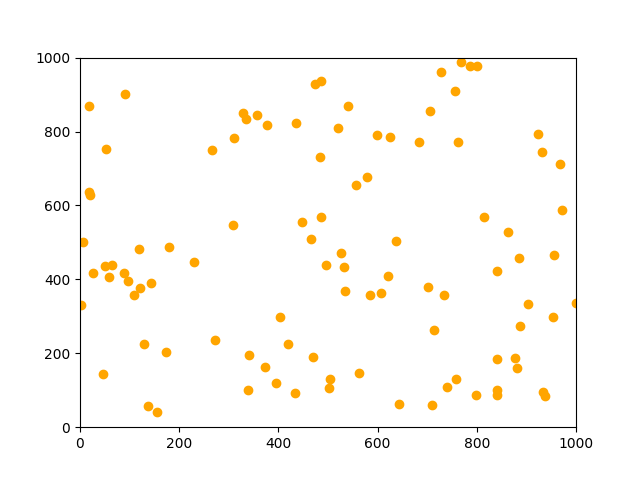

No such comm: 8eb4fca39ede4654a534f3f7f59f1522


In [7]:
# Launch the simulation in 2D
fig, ax = plt.subplots()
xs = [fish.position[0] for fish in aquarium.fishes]
ys = [fish.position[1] for fish in aquarium.fishes]
points = ax.scatter(xs, ys, marker='o', c=fish_color)
ax.set_xlim(0, width)
ax.set_ylim(0, height)

def update(data):
    ys, xs, fish_colors = data
    points.set_offsets(np.c_[xs, ys])
    points.set_color(fish_colors)
    return points

def generate_points():
    while True:
        aquarium.update_all()
        xs = [fish.position[0] for fish in aquarium.fishes]
        ys = [fish.position[1] for fish in aquarium.fishes]
        fish_colors = [fish.color for fish in aquarium.fishes]
        yield (ys, xs, fish_colors)

anim = animation.FuncAnimation(fig, update, generate_points, interval=frame_delay, cache_frame_data=False)
plt.show()

## 3D

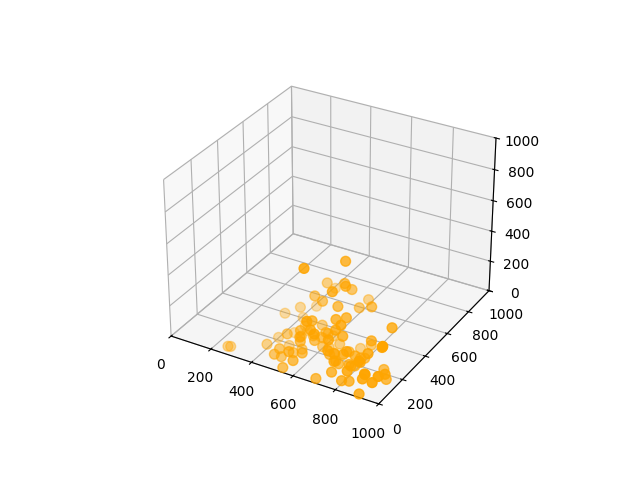

No such comm: f24a1587b85243ceac88bb5a0553e242


In [12]:
# Launch the simulation in 3D
xs = [fish.position[0] for fish in aquarium.fishes]
ys = [fish.position[1] for fish in aquarium.fishes]
zs = [fish.position[2] for fish in aquarium.fishes]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_zlim(0, depth)

points = ax.scatter(xs, ys, zs, marker='o', c=fish_color, s=50)

def update(data):
    ys, xs, zs, fish_colors = data
    points._offsets3d = (xs, ys, zs)
    points.set_color(fish_colors)
    return points

def generate_points():
    while True:
        aquarium.update_all()
        xs = [fish.position[0] for fish in aquarium.fishes]
        ys = [fish.position[1] for fish in aquarium.fishes]
        zs = [fish.position[2] for fish in aquarium.fishes]
        fish_colors = [fish.color for fish in aquarium.fishes]
        yield (ys, xs, zs, fish_colors)

anim = animation.FuncAnimation(fig, update, generate_points, interval=frame_delay, cache_frame_data=False)
plt.show()

# FUNNNY STEVE BONUS

"Steve, OuuOuOouuOOu, le poisson steve, il est oraaannnnngeee"

Here is a funny simulation with Trafalgar behavior but with images instead of points.
It is super slow so take your time.

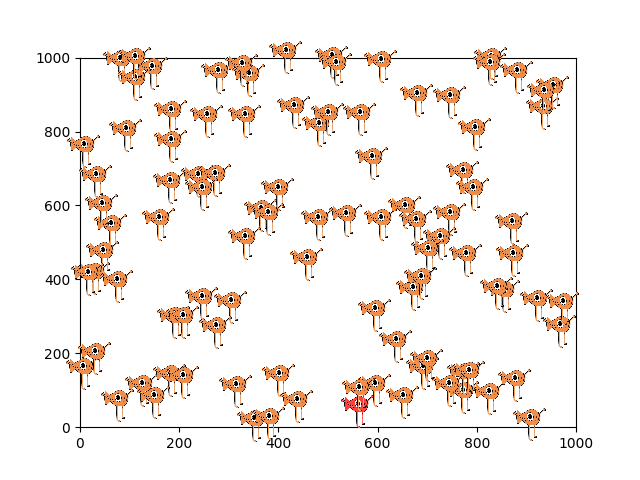

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7ae01fbecb00>>
Traceback (most recent call last):
  File "/home/cycy/Documents/workspace/projets_n7/fishoal/.venv/lib/python3.13/site-packages/tornado/ioloop.py", line 937, in _run
    val = self.callback()
  File "/home/cycy/Documents/workspace/projets_n7/fishoal/.venv/lib/python3.13/site-packages/matplotlib/backend_bases.py", line 1152, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/cycy/Documents/workspace/projets_n7/fishoal/.venv/lib/python3.13/site-packages/matplotlib/animation.py", line 1454, in _step
    self._init_draw()
    ~~~~~~~~~~~~~~~^^
  File "/home/cycy/Documents/workspace/projets_n7/fishoal/.venv/lib/python3.13/site-packages/matplotlib/animation.py", line 1757, in _init_draw
    frame_data = next(self.new_frame_seq())
  File "/tmp/ipykernel_50135/1850838954.py", line 25, in generate_points
    zs = [fish.posi

In [13]:
# Parameters
max_angle_rand_variation = np.pi/12
delay_rand_variation = 50
contamination_dist = 30
delay_contamination = 5
contaminated_color = "green"

# Create the fishes in a 2D aquarium
aquarium = Aquarium2D(width, height, nb_fish, dt_simu)

# Create the leader fish with random initial position and velocity
leader_behavior = StraightVariableReboundBehavior(
    aquarium,
    max_angle_rand_variation,
    delay_rand_variation)
velocity = (np.random.rand(2) * 2 - 1)
velocity /= np.linalg.norm(velocity)
position = np.random.rand(2) * [width, height]
fish_leader = Fish(position, velocity, "red", leader_behavior, steve_red_img)
aquarium.put_fish(0, fish_leader)

# Create the follower fishes with random initial position and velocity
for i in range(1, nb_fish):
    position = np.random.rand(2) * [width, height]
    velocity = (np.random.rand(2) * 2 - 1)
    velocity /= np.linalg.norm(velocity)
    trafalgar_behavior = TrafalgarBehavior(
        aquarium,
        fish_leader,
        contamination_dist,
        max_angle_rand_variation,
        delay_rand_variation,
        delay_contamination,
        contaminated_color,
        contaminated_img=steve_green_img)
    fish = Fish(position, velocity, fish_color, trafalgar_behavior, steve_orange_img)
    aquarium.put_fish(i, fish)

# Launch the simulation in 2D
fig, ax = plt.subplots()
ax.set_xlim(0, width)
ax.set_ylim(0, height)

fish_boxes = []
for fish in aquarium.fishes:
    image_box = OffsetImage(fish.image, zoom=0.05)
    ab = AnnotationBbox(image_box, (fish.position[0], fish.position[1]), frameon=False)
    ax.add_artist(ab)
    fish_boxes.append(ab)

def update(data):
    xs, ys, fish_images = data
    for i, ab in enumerate(fish_boxes):
        ab.offsetbox = OffsetImage(fish_images[i], zoom=0.05)
        ab.xy = (xs[i], ys[i])
        ab.xybox = (xs[i], ys[i])
    return fish_boxes

def generate_points():
    while True:
        aquarium.update_all()
        xs = [fish.position[0] for fish in aquarium.fishes]
        ys = [fish.position[1] for fish in aquarium.fishes]
        fish_images = [fish.image for fish in aquarium.fishes]
        yield (xs, ys, fish_images)

ani = animation.FuncAnimation(fig, update, generate_points, interval=frame_delay, cache_frame_data=False, blit=False)
plt.show()